In [ ]:
# 目的是消除生成图片中的 大网格，或者脏兮兮的一团一团的东西

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.util import random_noise
import torch
import torch.utils.data as Data 
from torch.nn import functional as F

from tqdm import tqdm
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片


In [ ]:
# tensor 
x = Image.open('./test/a4568_h.png')
y = Image.open('./test/a4568_pre.png')
x_1 = np.array(x)/255.
y_1 = np.array(y)/255.



x_torch = torch.from_numpy(image.transpose(2,0,1)) 
y_torhc = 
print(y_array)

In [ ]:
np.roll(y_array, 8, axis = 1)

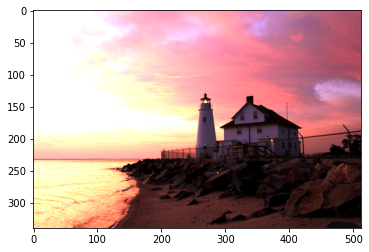

In [7]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

img_path = "./test/a.png"
img_torch = transforms.ToTensor()(Image.open(img_path))

plt.imshow(img_torch.numpy().transpose(1,2,0))
plt.show()

In [ ]:
from torch.nn import functional as F

theta = torch.tensor([
    [0.5, 0  , 0],
    [0  , 0.5, 0]
], dtype=torch.float)
grid = F.affine_grid(theta.unsqueeze(0), img_torch.unsqueeze(0).size())
output = F.grid_sample(img_torch.unsqueeze(0), grid)
new_img_torch = output[0]
plt.imshow(new_img_torch.numpy().transpose(1,2,0))
plt.show()

torch.Size([3, 340, 512])


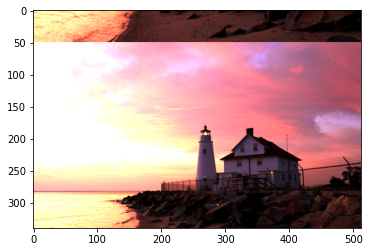

In [16]:
img_roll = torch.roll(img_torch,8,1)
print(img_torch.shape)
plt.imshow(img_roll.numpy().transpose(1,2,0))
plt.show()